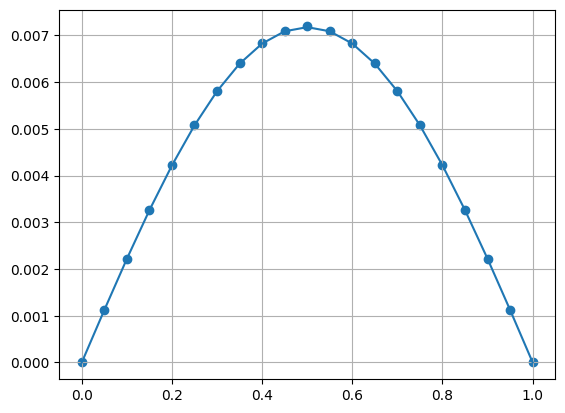

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

h = .05
k = .0005#.0005
k0 = 1
a = 0
b = 1
tend = .5
n = int((b-a)/h)
n2 = int((tend)/k)
x = np.linspace(a, b, n+1) #num subints (n+1) points in x
t = np.linspace(0, tend, n2+1)#num subints in t
lambda2 = (k0*k)/(h**2)
#initialize u and A
A = np.zeros([n-1,n-1]) #matrix solving for interior pts
u = np.zeros([n+1,n2+1]) #including boundary and IC
#IC
u[:,0] = np.sin(np.pi*x)
#Generate A
for i in range(len(A)):
  A[i,i] = 1-2*lambda2
for i in range(len(A)-1):
  A[i,i+1] = lambda2
  A[i+1,i] = lambda2
#fill in u
for j in range(1,n2+1):
  u[1:n,j] = np.matmul(A,u[1:n,j-1])

#display(pd.DataFrame(np.transpose(u)))
#Solution at end
plt.plot(x,u[:,-1])
exact = np.exp(-np.pi**2*tend)*np.sin(np.pi*x)
plt.scatter(x,exact)
plt.grid()
plt.show()

In [48]:
#Create Animation:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation',html='jshtml')

#initialize plotting area
fig, ax = plt.subplots(figsize = (3,3))
ax.set(xlim = (a,b), ylim = (0,1)) #set axes limits
#plot the initial graph
line, = ax.plot(x,u[:,0])
plt.xlabel('x')
plt.ylabel('u(t)')
plt.title('Temperature of a Rod with Zero Ends')
plt.close(fig)

#create an animation function to update the fig
def animate(frames):
  line.set_ydata(u[:,i])
  return line,
anim = FuncAnimation(fig, animate, blit = True, frames = len(t)-1)
anim

Output hidden; open in https://colab.research.google.com to view.